In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
import json
%matplotlib inline


In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [3]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # Setup map and marker
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=c1)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

In [2]:
dataset = pd.read_json('SatCatdata.json')

In [6]:
dataset.head()

,INTLDES,NORAD_CAT_ID,OBJECT_TYPE,SATNAME,COUNTRY,LAUNCH,SITE,DECAY,PERIOD,INCLINATION,...,RCSVALUE,RCS_SIZE,FILE,LAUNCH_YEAR,LAUNCH_NUM,LAUNCH_PIECE,CURRENT,OBJECT_NAME,OBJECT_ID,OBJECT_NUMBER
0,2000-055PV,41715,DEBRIS,NOAA 16 DEB,US,2000-09-21,AFWTR,NaN,101.98,98.78,...,0,SMALL,6129,2000,55,PV,Y,NOAA 16 DEB,2000-055PV,41715
1,2000-055PS,41712,DEBRIS,NOAA 16 DEB,US,2000-09-21,AFWTR,NaN,101.97,98.89,...,0,SMALL,6129,2000,55,PS,Y,NOAA 16 DEB,2000-055PS,41712
2,1965-027M,14515,DEBRIS,OPS 4682 DEB,US,1965-04-03,AFWTR,NaN,111.09,90.30,...,0,SMALL,6108,1965,27,M,Y,OPS 4682 DEB,1965-027M,14515
3,1978-026JD,37642,DEBRIS,DELTA 1 DEB,US,1978-03-05,AFWTR,NaN,96.29,98.12,...,0,SMALL,6123,1978,26,JD,Y,DELTA 1 DEB,1978-026JD,37642
4,1961-015LW,18651,DEBRIS,THOR ABLESTAR DEB *,US,1961-06-29,AFETR,NaN,116.10,65.70,...,0,SMALL,6113,1961,15,LW,Y,THOR ABLESTAR DEB *,1961-015LW,18651


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13299 entries, 0 to 13298
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INTLDES        13299 non-null  object 
 1   NORAD_CAT_ID   13299 non-null  int64  
 2   OBJECT_TYPE    13299 non-null  object 
 3   SATNAME        13299 non-null  object 
 4   COUNTRY        13299 non-null  object 
 5   LAUNCH         13299 non-null  object 
 6   SITE           13299 non-null  object 
 7   DECAY          0 non-null      float64
 8   PERIOD         13299 non-null  float64
 9   INCLINATION    13299 non-null  float64
 10  APOGEE         13299 non-null  int64  
 11  PERIGEE        13299 non-null  int64  
 12  COMMENT        0 non-null      float64
 13  COMMENTCODE    607 non-null    float64
 14  RCSVALUE       13299 non-null  int64  
 15  RCS_SIZE       13223 non-null  object 
 16  FILE           13299 non-null  int64  
 17  LAUNCH_YEAR    13299 non-null  int64  
 18  LAUNCH

In [9]:
dataset.describe()

,NORAD_CAT_ID,DECAY,PERIOD,INCLINATION,APOGEE,PERIGEE,COMMENT,COMMENTCODE,RCSVALUE,FILE,LAUNCH_YEAR,LAUNCH_NUM,OBJECT_NUMBER
count,13299.000000,0.0,13299.000000,13299.000000,13299.000000,13299.000000,0.0,607.000000,13299.0,13299.000000,13299.000000,13299.000000,13299.000000
mean,26801.203248,NaN,103.613851,86.312276,1017.548312,835.990150,NaN,2.294893,0.0,6116.145800,1990.127829,43.885029,26801.203248
std,12055.663931,NaN,6.388256,15.828985,380.962829,272.036811,NaN,0.976805,0.0,61.694143,13.173286,26.905752,12055.663931
min,11.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.0,1.000000,1958.000000,1.000000,11.000000
25%,17780.000000,NaN,99.740000,74.030000,787.000000,671.000000,NaN,1.000000,0.0,6113.000000,1979.500000,25.000000,17780.000000
50%,30472.000000,NaN,101.970000,90.300000,910.000000,784.000000,NaN,3.000000,0.0,6125.000000,1993.000000,36.000000,30472.000000
75%,36679.500000,NaN,105.325000,98.900000,1151.000000,906.000000,NaN,3.000000,0.0,6130.000000,1999.000000,57.000000,36679.500000
max,42457.000000,NaN,127.930000,144.640000,3723.000000,2021.000000,NaN,5.000000,0.0,6132.000000,2017.000000,128.000000,42457.000000


# Lets do some data explorartion

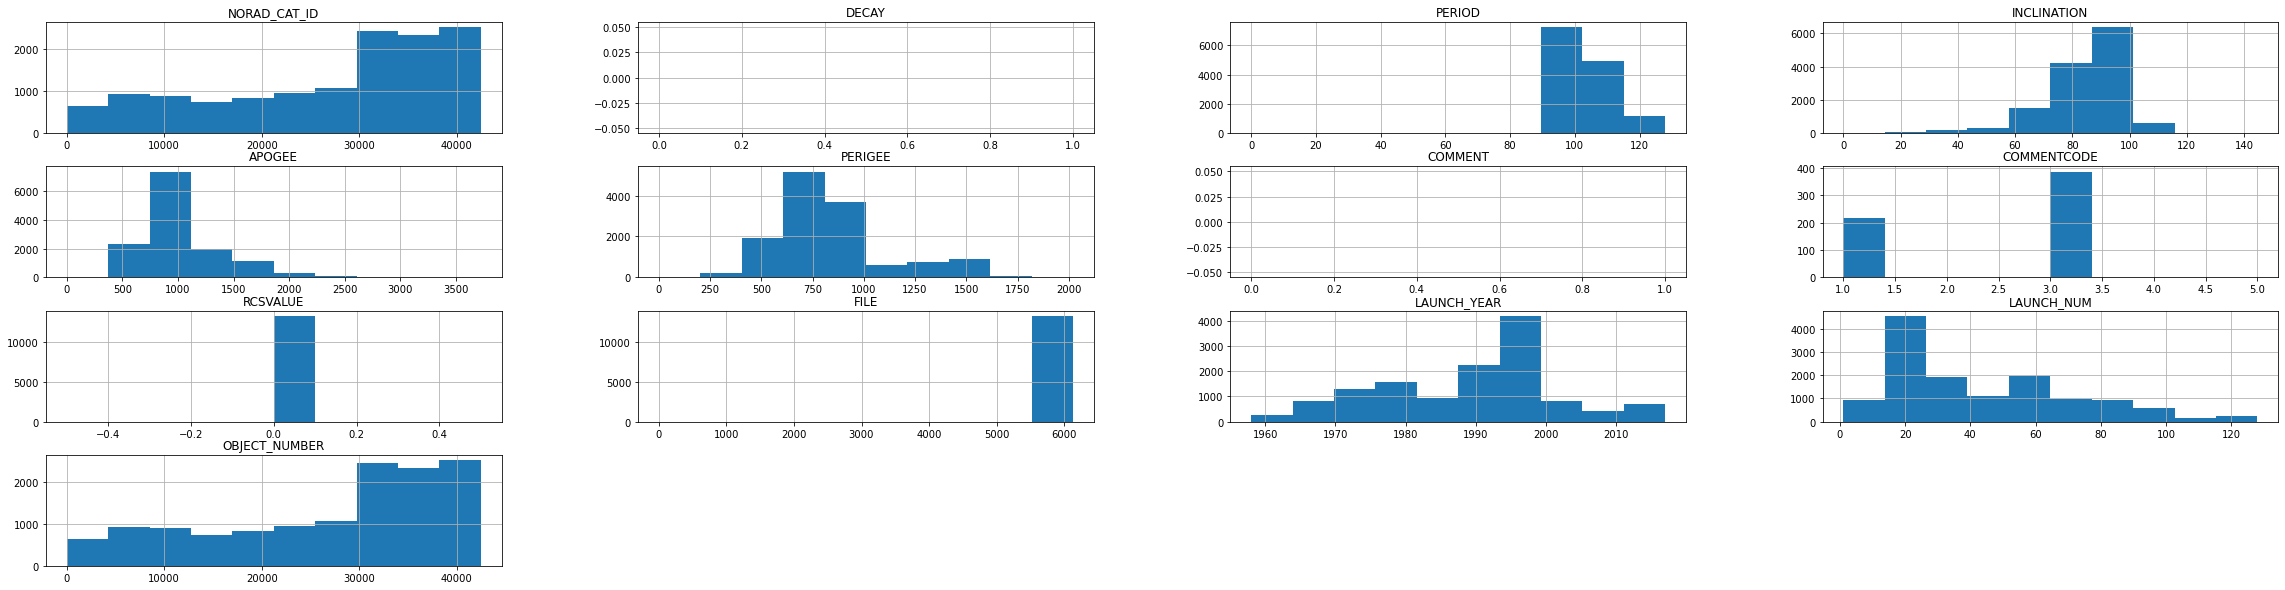

In [17]:
dataset.hist(figsize=(40,10))
plt.show()

## Which Countries have the most reported objects?

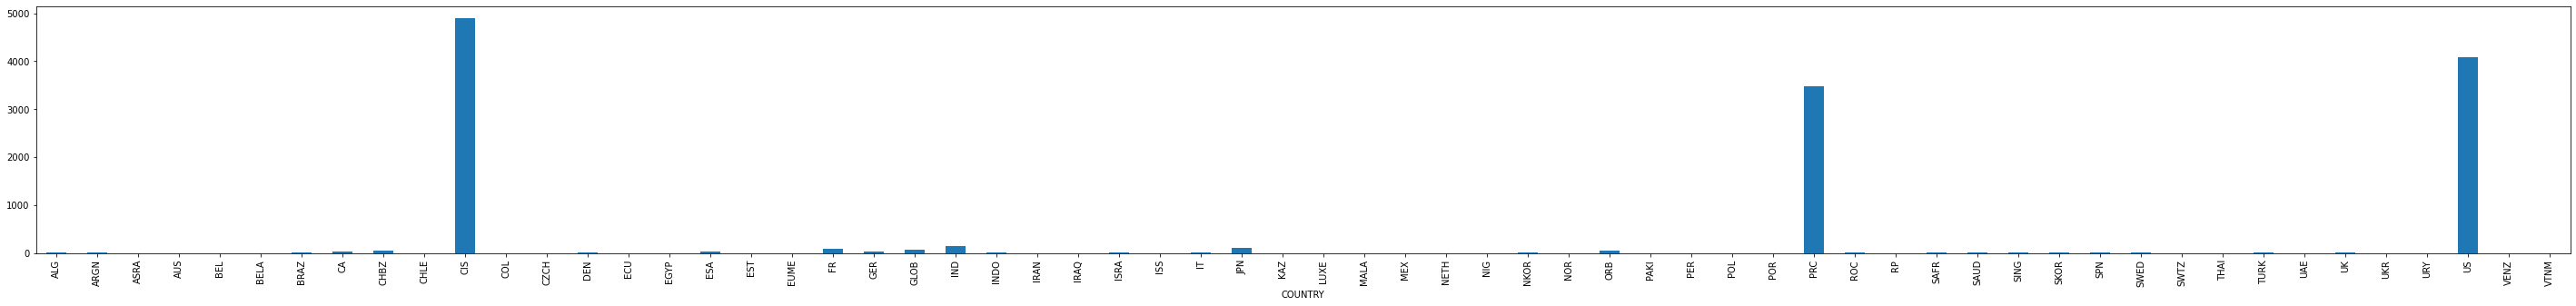

In [31]:
dfcountry = dataset.groupby(['COUNTRY'])['COUNTRY'].count()
dfcountry.plot(kind='bar')
plt.rcParams['figure.figsize'] = (40, 5)

In [8]:
dataset['COUNTRY'].value_counts()

CIS     4900
US      4075
PRC     3485
IND      137
JPN      103
        ... 
IRAQ       1
RP         1
BELA       1
VENZ       1
UKR        1
Name: COUNTRY, Length: 62, dtype: int64

Looking at the figure above, the Commenwealth of Independent states (CIS), US, and PRC respectivly, have the most reported objects.

<AxesSubplot:xlabel='OBJECT_TYPE'>

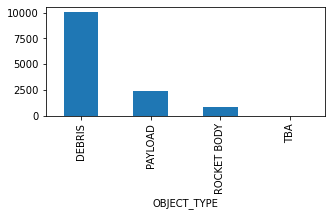

In [38]:
dfobjects = dataset.groupby(['OBJECT_TYPE'])['OBJECT_TYPE'].count()
dfobjects.plot(kind='bar', figsize=(5,2))

## Let's get a breakdown of the objects

In [32]:
dataset['OBJECT_TYPE'].value_counts()

DEBRIS         10041
PAYLOAD         2408
ROCKET BODY      838
TBA               12
Name: OBJECT_TYPE, dtype: int64

<AxesSubplot:xlabel='RCS_SIZE'>

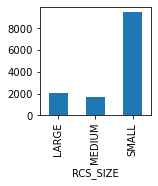

In [36]:
dfobjects = dataset.groupby(['RCS_SIZE'])['RCS_SIZE'].count()
dfobjects.plot(kind='bar', figsize=(2,2))

It looks like most of the objects are small and debris, which may pose issue with navigating around the debris for spacecraft.

# Lets see if we can gain some insights on the data by clustering

In [81]:
dataset['LAUNCH_PIECE'].value_counts()

A      1027
B       927
C       528
D       462
E       350
       ... 
CHK       1
EBC       1
ELK       1
BJY       1
EQS       1
Name: LAUNCH_PIECE, Length: 3093, dtype: int64

In [83]:
dataset['SITE'].value_counts()

PKMTR    3867
TSC      3355
AFWTR    3023
TTMTR    1601
AFETR     451
SRI       312
JSC       193
FRGUI     129
OREN      110
TNSTA      71
WLPIS      51
ERAS       40
WRAS       24
XSC        15
KSCUT      12
HGSTR      11
KYMTR      10
KWAJ        7
YUN         6
SVOB        4
VOSTO       3
WOMRA       2
NSC         2
Name: SITE, dtype: int64

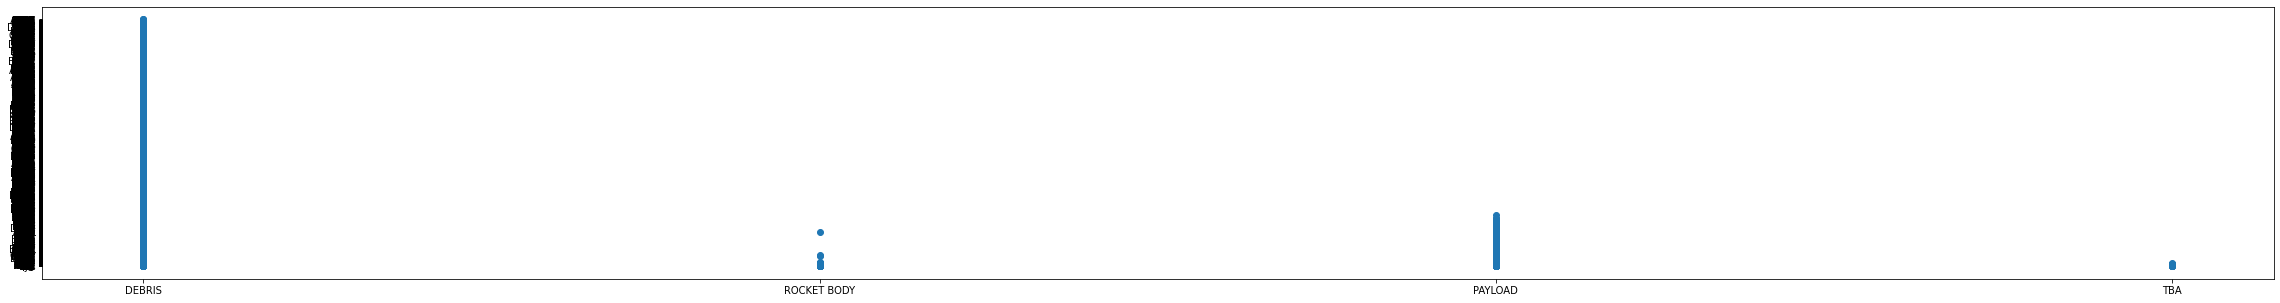

In [79]:
plt.scatter(dataset['OBJECT_TYPE'],dataset['LAUNCH_PIECE'].fillna(0))
plt.show()

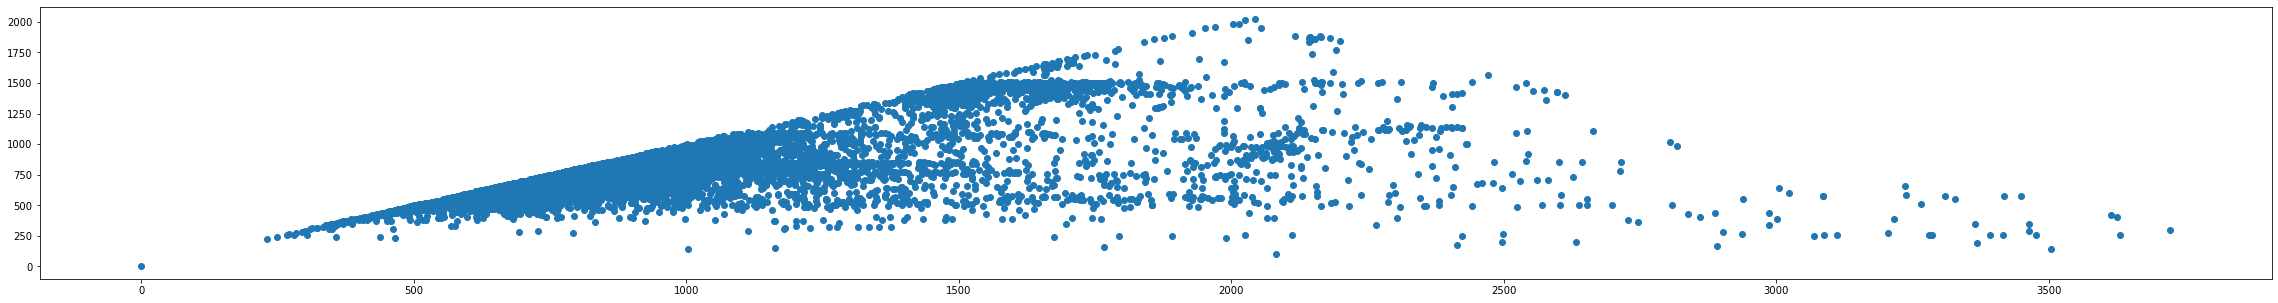

In [60]:
plt.scatter(dataset['APOGEE'], dataset['PERIGEE'])

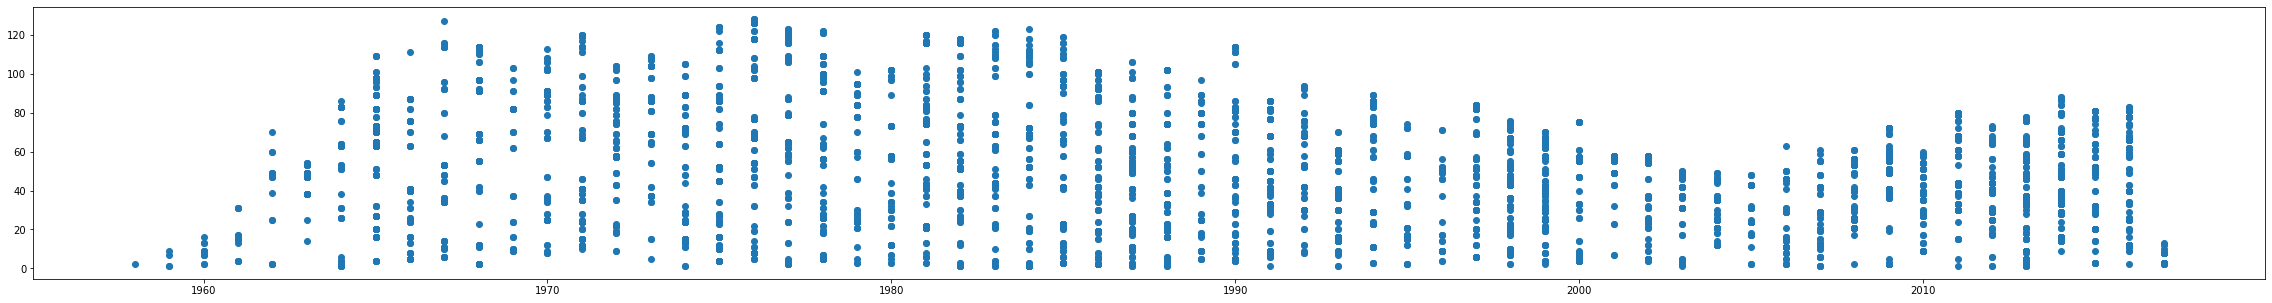

In [82]:
plt.scatter(dataset['LAUNCH_YEAR'],dataset['LAUNCH_NUM'])

# Time to prepare the dataset and do some trimming

In [71]:
# drop some the columns that have no values or may not be relevant
dataset.drop(['NORAD_CAT_ID','COMMENT','COMMENTCODE','RCSVALUE','FILE','DECAY','LAUNCH_NUM'], axis=1)

,INTLDES,OBJECT_TYPE,SATNAME,COUNTRY,LAUNCH,SITE,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS_SIZE,LAUNCH_YEAR,LAUNCH_PIECE,CURRENT,OBJECT_NAME,OBJECT_ID,OBJECT_NUMBER
0,2000-055PV,DEBRIS,NOAA 16 DEB,US,2000-09-21,AFWTR,101.98,98.78,863,842,SMALL,2000,PV,Y,NOAA 16 DEB,2000-055PV,41715
1,2000-055PS,DEBRIS,NOAA 16 DEB,US,2000-09-21,AFWTR,101.97,98.89,888,816,SMALL,2000,PS,Y,NOAA 16 DEB,2000-055PS,41712
2,1965-027M,DEBRIS,OPS 4682 DEB,US,1965-04-03,AFWTR,111.09,90.30,1299,1255,SMALL,1965,M,Y,OPS 4682 DEB,1965-027M,14515
3,1978-026JD,DEBRIS,DELTA 1 DEB,US,1978-03-05,AFWTR,96.29,98.12,607,555,SMALL,1978,JD,Y,DELTA 1 DEB,1978-026JD,37642
4,1961-015LW,DEBRIS,THOR ABLESTAR DEB *,US,1961-06-29,AFETR,116.10,65.70,2086,925,SMALL,1961,LW,Y,THOR ABLESTAR DEB *,1961-015LW,18651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13294,1960-002B,PAYLOAD,TIROS 1,US,1960-04-01,AFETR,97.68,48.38,665,630,MEDIUM,1960,B,Y,TIROS 1,1960-002B,29
13295,1959-009A,PAYLOAD,EXPLORER 7,US,1959-10-13,AFETR,96.38,50.28,684,486,MEDIUM,1959,A,Y,EXPLORER 7,1959-009A,22
13296,1959-007A,PAYLOAD,VANGUARD 3,US,1959-09-18,AFETR,124.63,33.35,3266,508,MEDIUM,1959,A,Y,VANGUARD 3,1959-007A,20
13297,1959-001B,ROCKET BODY,VANGUARD R/B,US,1959-02-17,AFETR,125.86,32.90,3328,554,MEDIUM,1959,B,Y,VANGUARD R/B,1959-001B,12


In [65]:
# Lets attempt to cluster the objects based on the apogee and perig

KeyError: "['COMMENTS'] not found in axis"

In [400]:
# Use k-means clustering to cluster the dataset
from sklearn import cluster

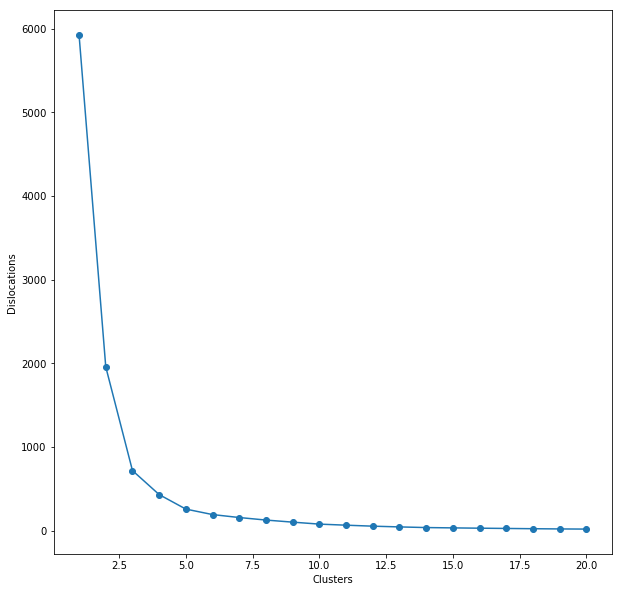

In [401]:
# Find where the number of clusters improve
distortions_obj = []
for i in range(1,21):
    km = cluster.KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0, n_jobs=-1)
    km.fit(obj_labl)
    distortions_obj.append(km.inertia_)
plt.plot(range(1,21), distortions_obj, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Dislocations')
plt.show()

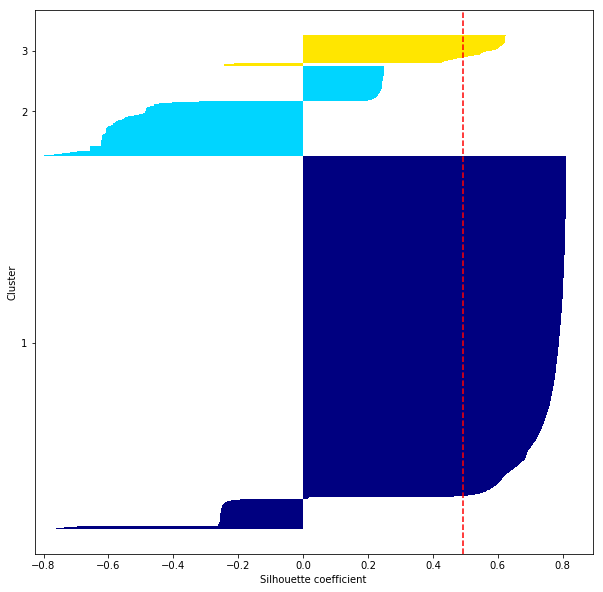

In [402]:
# create a sillouite plot
km = cluster.KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=500, random_state=0, n_jobs=-1)
y_km = km.fit_predict(obj_labl)

from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(labl_data, y_km, metric='euclidean')

y_ax_low, y_ax_up = 0, 0
y_ticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_up += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_low, y_ax_up), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    y_ticks.append((y_ax_low + y_ax_up) / 2) 
    y_ax_low += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle="--")
plt.yticks(y_ticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

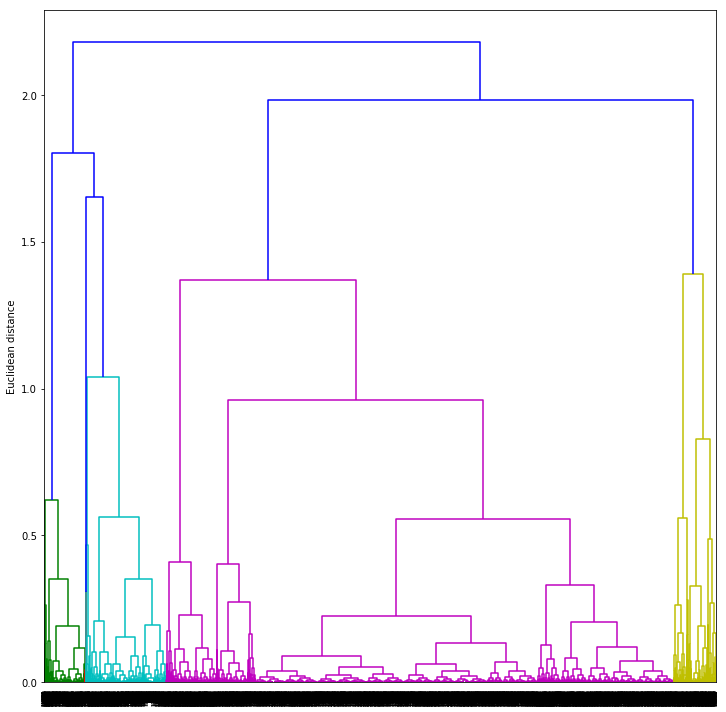

In [404]:
row_clusters = linkage(obj_labl.values,method='complete', metric='euclidean')
row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [389]:
# Split into training and test data
# X = dataset.RCS_SIZE

# labl_data = pd.get_dummies(clus_data[['RCS_SIZE', 'orbit_speed']])
labl_data = pd.get_dummies(clus_data[['RCS_SIZE','orbit_speed']])

# Y = orbit_speed
labl_data.head()

,orbit_speed,RCS_SIZE_LARGE,RCS_SIZE_MEDIUM,RCS_SIZE_SMALL
0,0.875403,0,0,1
1,0.874975,0,0,1
2,1.203773,0,0,1
3,0.631864,0,0,1
4,1.357929,0,0,1


(<matplotlib.collections.PathCollection at 0x7fc5c25e6550>,)

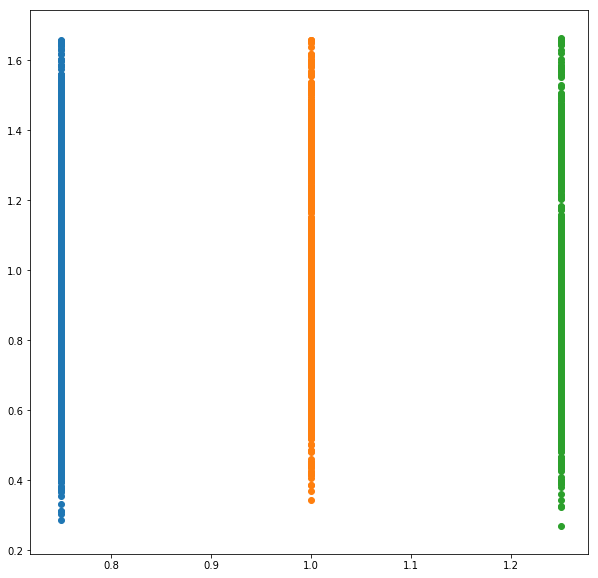

In [392]:
plt.scatter(labl_data.RCS_SIZE_SMALL[labl_data.RCS_SIZE_SMALL == 1] - .25, orbit_speed[labl_data.RCS_SIZE_SMALL == 1])
plt.scatter(labl_data.RCS_SIZE_MEDIUM[labl_data.RCS_SIZE_MEDIUM == 1], orbit_speed[labl_data.RCS_SIZE_MEDIUM == 1]),
plt.scatter(labl_data.RCS_SIZE_LARGE[labl_data.RCS_SIZE_LARGE == 1]+.25, orbit_speed[labl_data.RCS_SIZE_LARGE == 1]),


In [343]:
# Train the dataset using k-means
k_means = cluster.KMeans(n_clusters=3, random_state=0, n_jobs=-1, n_init=10, max_iter=500)
y_km = k_means.fit_predict(labl_data)


In [344]:
# plt.scatter(labl_data[y_km==0,0], labl_data[y_km==0,1], 
#            s=50, c='lightgreen', marker='s', label='cluster 1')
# plt.scatter(labl_data[y_km==1,0], labl_data[y_km==1,1], 
#            s=50, c='lightblue', marker='o', label='cluster 1')
# plt.scatter(labl_data[y_km==2,0], labl_data[y_km==2,1], 
#            s=50, c='orange', marker='v', label='cluster 1')
# plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1],
#             s=50, marker='*', c='red', label='centroids')
# plt.legend()
# plt.grid()
# plt.show()

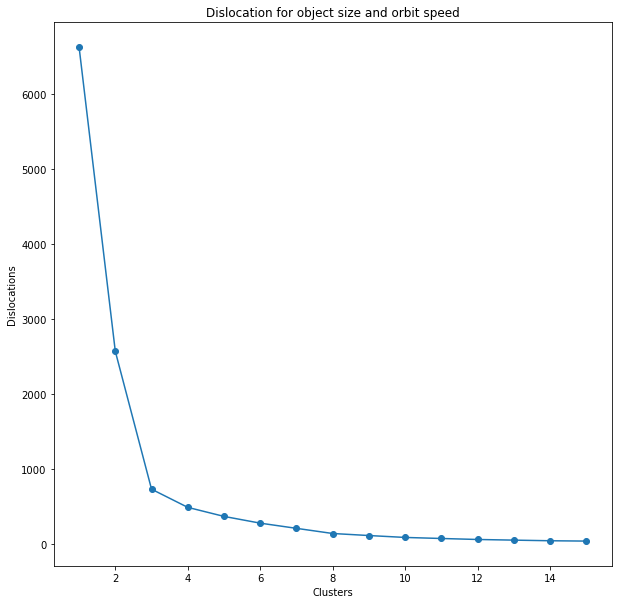

In [345]:
# Find where the number of clusters improve
distortions = []
for i in range(1,16):
    km = cluster.KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0, n_jobs=-1)
    km.fit(labl_data)
    distortions.append(km.inertia_)
plt.plot(range(1,16), distortions, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Dislocations')
plt.title('Dislocation for object size and orbit speed')
plt.show()

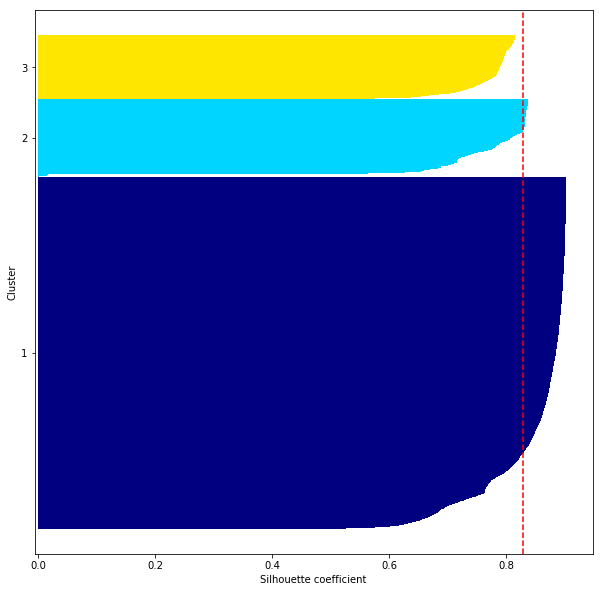

In [346]:
# create a sillouite plot
km = cluster.KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=500, random_state=0, n_jobs=-1)
y_km = km.fit_predict(labl_data)

from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(labl_data, y_km, metric='euclidean')

y_ax_low, y_ax_up = 0, 0
y_ticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_up += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_low, y_ax_up), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    y_ticks.append((y_ax_low + y_ax_up) / 2) 
    y_ax_low += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle="--")
plt.yticks(y_ticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

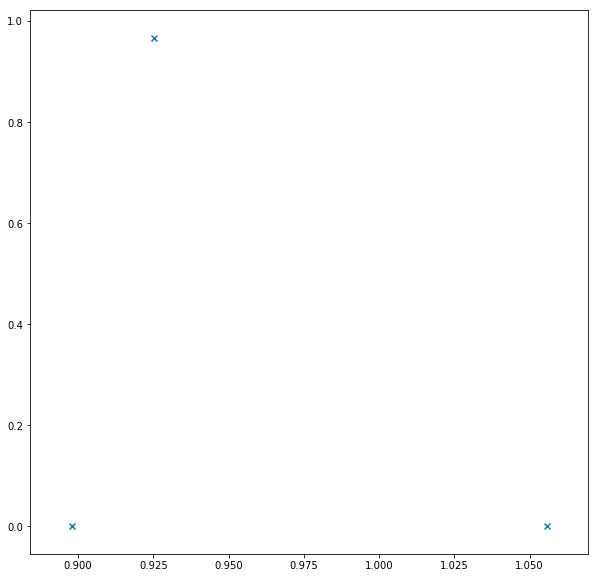

In [347]:
centroids = k_means.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:,1], marker='x' )
plt.scatter(y_km[0])
plt.show()

In [ ]:
# # assignment, cdist = cluster.vq.vq(X_train, Y_train)
# pyplot.scatter(X_train['SMALL'], Y_train)
# pyplot.scatter(Y_train, X_train['MEDIUM'])
# pyplot.scatter(X_train['LARGE'], Y_train)
# pyplot.show()

In [348]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

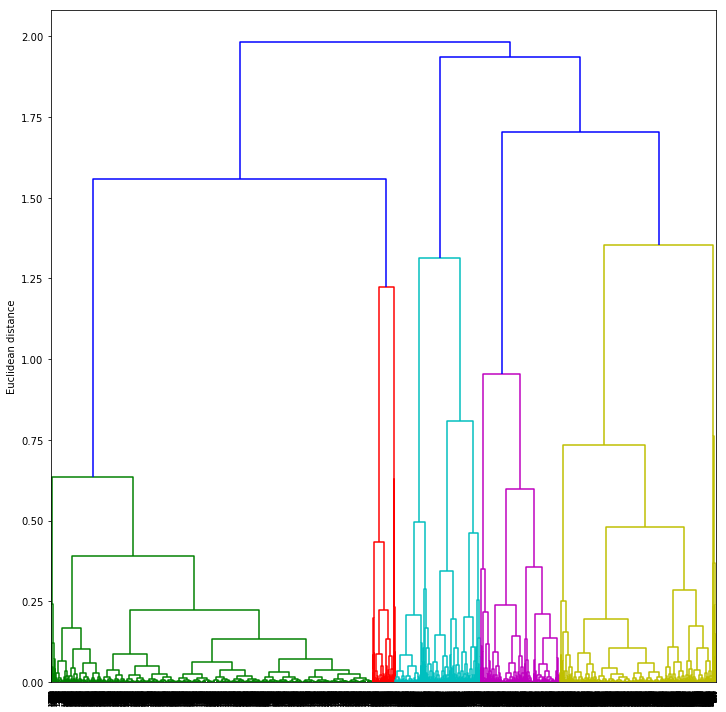

In [405]:
row_clusters = linkage(labl_data.values,method='complete', metric='euclidean')
row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [350]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(labl_data)
print(labels)

[1 1 0 ..., 2 2 2]
